In [1058]:
import pandas as pd

df_temp = pd.read_csv("data/AnnualMeanGlobalSurfaceTemperature.csv")
df_temp.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate and Weath...",...,0.521,1.204,1.612,1.642,1.624,0.991,0.587,1.475,2.154,1.956
1,2,Africa,NaN,AFRTMP,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate and Weath...",...,1.013,1.190,1.392,1.180,1.178,1.297,1.200,1.396,0.996,1.485
2,3,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate and Weath...",...,1.285,1.667,1.558,1.196,2.103,1.751,1.567,1.589,1.585,2.122
3,4,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate and Weath...",...,1.713,1.153,1.787,1.533,1.231,1.107,1.905,2.360,1.776,2.274
4,5,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate and Weath...",...,0.840,0.679,1.209,1.105,0.859,1.209,1.101,0.938,0.925,0.951


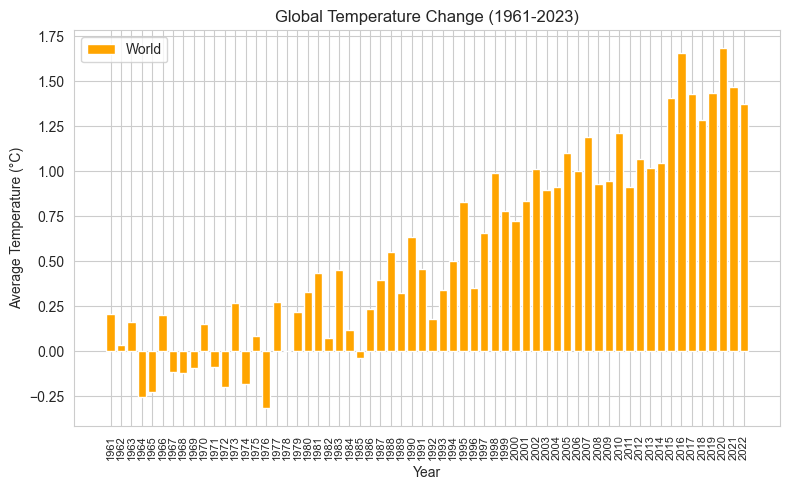

In [1059]:
# Datast includes a row for World, allowing us to see how the temperature changes globally over the years
import matplotlib.pyplot as plt

world_data = df_temp[df_temp['Country'] == 'World']
years = [str(year) for year in range(1961, 2023)]
world_temperatures = world_data[years].values.flatten()

plt.figure(figsize=(8, 5))
plt.bar(years, world_temperatures, color='orange', label='World')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Average Temperature (°C)', fontsize=10)
plt.title('Global Temperature Change (1961-2023)', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [1060]:
# The global temperature is increasing over the years

In [1061]:
from helpers import is_country

# Remove no-country data
df_temp = df_temp[df_temp['ISO3'].apply(is_country)]

In [1062]:
df_temp = df_temp.drop(['ISO2', 'Indicator', 'Unit', 'Source', 'CTS Code', 'CTS Name', 'CTS Full Descriptor'], axis=1)
# df.head()

In [1063]:
# Missing values
print(df_temp.isnull().sum().to_string())

ObjectId     0
Country      0
ISO3         0
1961        34
1962        34
1963        35
1964        35
1965        36
1966        34
1967        35
1968        35
1969        35
1970        36
1971        34
1972        33
1973        33
1974        33
1975        37
1976        35
1977        37
1978        36
1979        35
1980        34
1981        35
1982        33
1983        34
1984        36
1985        36
1986        34
1987        34
1988        34
1989        34
1990        34
1991        35
1992        13
1993        12
1994        13
1995        11
1996        11
1997        13
1998         9
1999        10
2000        11
2001        11
2002         9
2003         7
2004         7
2005         9
2006         6
2007         5
2008         9
2009         7
2010         6
2011         4
2012         6
2013         5
2014         5
2015         5
2016         5
2017         5
2018         5
2019         6
2020         8
2021         6
2022         6
2023         8


In [1064]:
# Missing values per Country
missing_values = pd.concat([df_temp['Country'], df_temp.isnull().sum(axis=1)], axis=1)
missing_values.columns = ['Country', 'Missing Values']
print(missing_values.to_string())

                                 Country  Missing Values
0           Afghanistan, Islamic Rep. of               0
2                                Albania               0
3                                Algeria               0
6               Andorra, Principality of               0
7                                 Angola               0
10                   Antigua and Barbuda               1
11                             Argentina               0
12                      Armenia, Rep. of              31
15                             Australia               0
16                               Austria               0
17                   Azerbaijan, Rep. of              31
18                          Bahamas, The               0
19                   Bahrain, Kingdom of               0
20                            Bangladesh               0
21                              Barbados               1
22                      Belarus, Rep. of              31
23                             

In [1065]:
# Given that some countries in the dataset have a significant number of missing values at the beginning of the time period, the analysis focuses on counting the missing values starting only from the first year that contains a valid value

year_columns = [col for col in df_temp.columns if col.isdigit() and 1961 <= int(col) <= 2023]
def count_missing_after_first(row):
    first_valid_index = row[year_columns].first_valid_index()  
    if first_valid_index:
        return row.loc[first_valid_index:].isnull().sum()  
    return 0 

df_temp['Missing Values After First Year'] = df_temp.apply(count_missing_after_first, axis=1)
print(df_temp[['Country', 'Missing Values After First Year']].to_string())

                                 Country  Missing Values After First Year
0           Afghanistan, Islamic Rep. of                                0
2                                Albania                                0
3                                Algeria                                0
6               Andorra, Principality of                                0
7                                 Angola                                0
10                   Antigua and Barbuda                                1
11                             Argentina                                0
12                      Armenia, Rep. of                                0
15                             Australia                                0
16                               Austria                                0
17                   Azerbaijan, Rep. of                                0
18                          Bahamas, The                                0
19                   Bahrain, Kingdom 

In [1066]:
# After calculating the number of missing values in this way, we can see that several countries have over 30 missing values: Burundi, Nauru, Rwanda, and Yemen. These rows contain large segments of missing values or uncertain data in the present, so we will drop these rows
# Costa Rica does not have more than 30 missing values, but the data for the recent period is not accurate, so we will drop this row as well

countries_to_drop = ['BDI', 'NRU', 'RWA', 'YEM', 'CRI']
df_temp = df_temp[~df_temp['ISO3'].isin(countries_to_drop)]
# print(df_temp[['Country', 'Missing Values After First Year']].to_string())

In [1067]:
# To fill in the missing values, we will use linear interpolation. If the segment with missing values is at the end of the time period (the last few years), the value will remain null because interpolation cannot be performed

import pandas as pd

def interpolate_missing_values(df):
    last_cell = len(df.columns) - 1
    for idx, row in df.iterrows():
        first_valid_index = row[year_columns].first_valid_index()
        year_idx = df.columns.get_loc(first_valid_index)
        while year_idx < last_cell:
            if pd.isnull(row.iloc[year_idx]):
                start_idx = year_idx - 1
                i = year_idx
                while i < last_cell:
                    if pd.isnull(row.iloc[i]):
                        i += 1
                    else:
                        end_idx = i
                        segment = row.iloc[start_idx:end_idx+1]
                        segment = pd.to_numeric(segment, errors='coerce')  
                        interpolated_segment = segment.interpolate(method='linear', axis=0)
                        df.loc[idx, df.columns[start_idx:end_idx + 1]] = interpolated_segment
                        year_idx = i
                        break
            year_idx += 1
    return df

df_temp = interpolate_missing_values(df_temp)

In [1068]:
# Now we will represent the global temperature change by country
# For each country, the temperature changes will be summed from the first year with a record to the last year with a record, and we will calculate the average value to ensure equal correctness for all countries

def calculate_mean_temperature_change(df):
    results = []
    for idx, row in df.iterrows():
        temperature_data = row[year_columns]
        first_valid_index = temperature_data.first_valid_index()
        last_valid_index = temperature_data.last_valid_index()
        valid_values = temperature_data.loc[first_valid_index:last_valid_index]
        value_sum = valid_values.sum()
        count = valid_values.count()
        results.append(value_sum / count)
    df['Mean Temperature Change'] = results
    return df

df_temp = calculate_mean_temperature_change(df_temp)

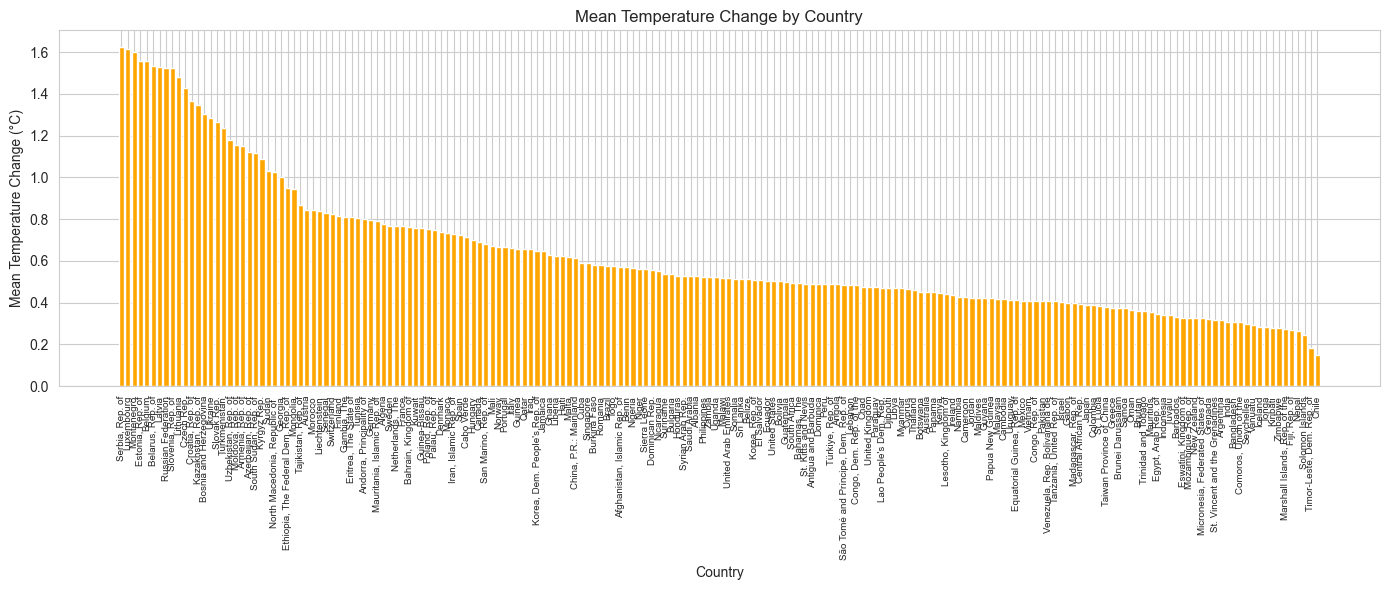

In [1069]:
# Global Mean Temperature change

df_temp = df_temp.sort_values(by='Mean Temperature Change', ascending=False)
plt.figure(figsize=(14, 6))
plt.bar(df_temp['Country'], df_temp['Mean Temperature Change'], color='orange')
plt.title('Mean Temperature Change by Country', fontsize=12)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Mean Temperature Change (°C)', fontsize=10)
plt.xticks(rotation=90, fontsize=7)
plt.tight_layout()
plt.show()

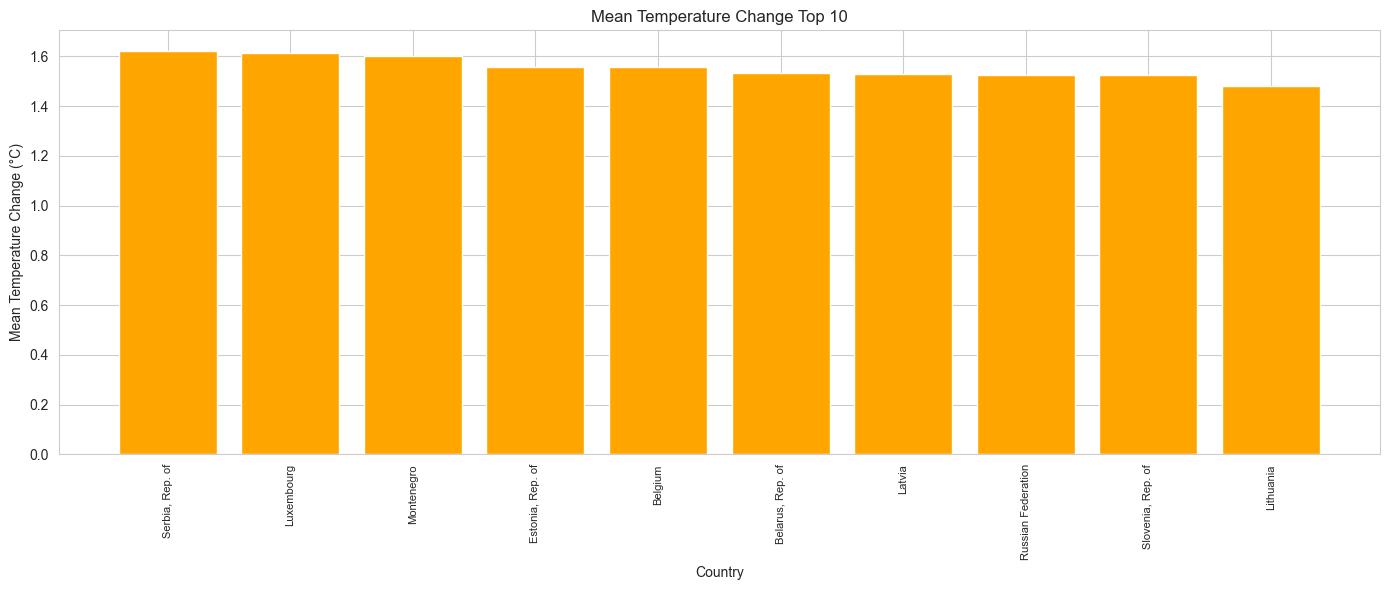

In [1070]:
# Top 10 Countries

df_temp_top_10 = df_temp.head(10)
plt.figure(figsize=(14, 6))
plt.bar(df_temp_top_10['Country'], df_temp_top_10['Mean Temperature Change'], color='orange')
plt.title('Mean Temperature Change Top 10', fontsize=12)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Mean Temperature Change (°C)', fontsize=10)
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()